In [23]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [ ]:
# 1. 加载数据集（使用Iris数据集作为例子）
iris = pd.read_csv('data\iris.csv')  #读取数据文件
X = iris.iloc[:, :4].values  #获得样本数据
y = iris.iloc[:,-1].values   #获得样本的类标签

# 2. 获得PCA降维到2维后的数据,保存在data_pca中
#补充你的代码
def pca_manual(X, n_components):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0, ddof=1)
    X_standardized = (X - X_mean) / X_std
    covariance_matrix = np.dot(X_standardized.T, X_standardized) / (X_standardized.shape[0] - 1)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    top_eigenvectors = eigenvectors[:, :n_components]
    X_pca = np.dot(X_standardized, top_eigenvectors)
    return X_pca


data_pca = pca_manual(X, n_components=2)
print('PCA降维:\n', data_pca)



PCA降维:
 [[-2.25714118 -0.47842383]
 [-2.07401302  0.67188269]
 [-2.35633511  0.34076642]
 [-2.29170679  0.59539986]
 [-2.3818627  -0.64467566]
 [-2.06870061 -1.4842053 ]
 [-2.43586845 -0.04748512]
 [-2.22539189 -0.222403  ]
 [-2.32684533  1.1116037 ]
 [-2.17703491  0.46744757]
 [-2.15907699 -1.04020587]
 [-2.31836413 -0.132634  ]
 [-2.2110437   0.72624318]
 [-2.62430902  0.95829635]
 [-2.19139921 -1.85384655]
 [-2.25466121 -2.67731523]
 [-2.20021676 -1.47865573]
 [-2.18303613 -0.48720613]
 [-1.89223284 -1.40032757]
 [-2.33554476 -1.1240836 ]
 [-1.90793125 -0.40749058]
 [-2.19964383 -0.92103587]
 [-2.76508142 -0.4568133 ]
 [-1.81259716 -0.08527285]
 [-2.21972701 -0.13679618]
 [-1.9453293   0.62352971]
 [-2.04430277 -0.24135499]
 [-2.1613365  -0.52538942]
 [-2.13241965 -0.312172  ]
 [-2.25769799  0.33660425]
 [-2.13297647  0.50285608]
 [-1.82547925 -0.42228039]
 [-2.60621687 -1.78758727]
 [-2.43800983 -2.1435468 ]
 [-2.10292986  0.45866527]
 [-2.20043723  0.20541922]
 [-2.03831765 -0.659

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\admin\AppData\Local\Temp\ipykernel_39320\3971664554.py:2: SyntaxWarning: invalid escape sequence '\i'
  iris = pd.read_csv('data\iris.csv')  #读取数据文件


In [30]:

# 3. KNN算法类定义
class KNN:
    def __init__(self, k=3):
        self.k = k  # 设置邻居数目    

    # 训练模型（存储训练数据）
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # 计算欧氏距离
    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    # 预测一组数据点的类别
    def predict(self, X_test):
        predictions = []

        #补充你的代码
        for test_point in X_test:
            distances = [self.euclidean_distance(test_point, train_point) for train_point in self.X_train]
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            label_counts = Counter(k_nearest_labels)
            most_common_label = max(label_counts, key=label_counts.get)
            predictions.append(most_common_label)
        return np.array(predictions)

In [31]:
# 4. 数据集划分，80%训练集，20%测试集
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.2, random_state=42)

# 5. 初始化KNN模型并训练
knn = KNN(k=3)
knn.fit(X_train, y_train)

# 6. 对测试集进行预测
y_pred = knn.predict(X_test)

# 7. 打印预测结果
print("预测结果：", y_pred)
print("真实标签：", y_test)


预测结果： ['versicolor' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
真实标签： ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [32]:
from sklearn.metrics import accuracy_score, classification_report

# 8. 评估分类器的性能
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(y)))

Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



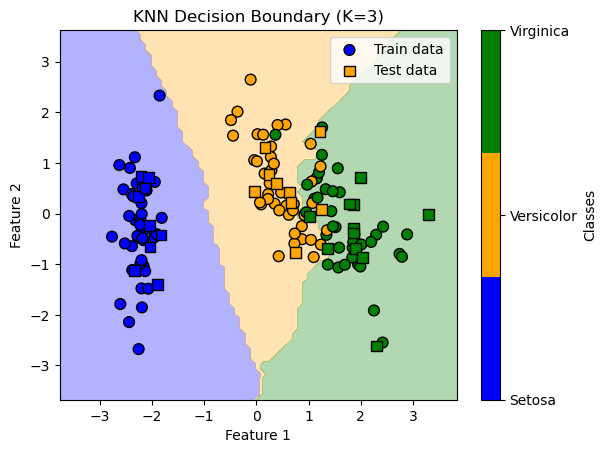

In [33]:

# 9. 可视化

# 创建网格用于绘制决策边界
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

label_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# 批量预测网格上的类别
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z_mapped = np.vectorize(label_map.get)(Z)  # 映射为数字标签

# 将 Z 数组重塑为网格形状
Z_mapped = Z_mapped.reshape(xx.shape)

# 使用 label_map 将 y_train 和 y_test 映射为数字
y_train_mapped = np.vectorize(label_map.get)(y_train)
y_test_mapped = np.vectorize(label_map.get)(y_test)

# 自定义颜色映射，只使用3种颜色，直接使用颜色名称
colors = ['blue', 'orange', 'green']  # Setosa, Versicolor, Virginica
cmap = mcolors.ListedColormap(colors)

# 绘制决策边界
plt.contourf(xx, yy, Z_mapped, alpha=0.3, cmap=cmap, levels=np.arange(-0.5, 3.5, 1))

# 绘制训练数据点
scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_mapped, marker='o', edgecolor='k', s=60, cmap=cmap, label='Train data')

# 绘制测试数据点
scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_mapped, marker='s', edgecolor='k', s=60, cmap=cmap, label='Test data')

# 设置坐标轴标签和标题
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary (K=3)')

# 自动生成图例
plt.legend()

# 获取 colorbar
cbar = plt.colorbar(scatter_train, label='Classes')

# 设置色条的刻度为三个类别，分别为 0, 1, 2（对应 Setosa, Versicolor, Virginica）
cbar.set_ticks([0, 1, 2])  # 设置为三个类别的刻度
cbar.set_ticklabels(['Setosa', 'Versicolor', 'Virginica'])  # 设置对应的标签

# 显示图形
plt.show()
